<a href="https://colab.research.google.com/github/gbonarjr/MIT725/blob/main/George_V_Bonar_Jr_CAT1_MIT725.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
# URL of the data
url = "https://www.worldometers.info/population/countries-in-africa-by-population/"


In [ ]:
# Fetch the webpage
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
# Locate the table
table = soup.find('table', {'class': 'table table-striped table-bordered'})

In [ ]:
# Extract headers
headers = [header.text for header in table.find_all('th')]

In [ ]:
# Extract rows
rows = []
for row in table.find_all('tr')[1:]:
    cells = row.find_all('td')
    rows.append([cell.text for cell in cells])

In [ ]:
# Create DataFrame
df = pd.DataFrame(rows, columns=headers)

In [ ]:
# Clean the data
df.replace({'': np.nan, 'N.A.': np.nan}, inplace=True)
df.dropna(inplace=True)
df['Population (2020)'] = df['Population (2020)'].str.replace(',', '').astype(int)
df['Yearly Change'] = df['Yearly Change'].str.replace('%', '').astype(float)
df['Net Change'] = df['Net Change'].str.replace(',', '').astype(int)
df['Density (P/Km²)'] = df['Density (P/Km²)'].str.replace(',', '').astype(int)
df['Land Area (Km²)'] = df['Land Area (Km²)'].str.replace(',', '').astype(int)
df['Migrants (net)'] = df['Migrants (net)'].str.replace(',', '').astype(float)
df['Fert. Rate'] = df['Fert. Rate'].astype(float)
df['Med. Age'] = df['Med. Age'].astype(float)
df['Urban Pop %'] = df['Urban Pop %'].str.replace('%', '').astype(float)

KeyError: 'Population (2020)'

In [ ]:
# Descriptive Statistics
desc_stats = df.describe()

In [ ]:
# Default Correlations
correlations = df.corr()

ValueError: could not convert string to float: 'Nigeria'

In [ ]:
print(desc_stats)
print(correlations)

         # Country (or dependency) Population (2024) Yearly Change Net Change  \
count   57                      57                57            57         57   
unique  57                      57                57            52         57   
top      1                 Nigeria       232,679,478        2.62 %  4,796,533   
freq     1                       1                 1             2          1   

       Density (P/Km²) Land Area (Km²) Migrants (net) Fert. Rate Med. Age  \
count               57              57             57         57       57   
unique              50              57             57         28       20   
top                 20         910,770        -35,202        2.7       18   
freq                 3               1              1          5       12   

       Urban Pop % World Share  
count           57          57  
unique          37          37  
top           44 %      0.03 %  
freq             5           5  


NameError: name 'correlations' is not defined

Simple Linear Regression

We'll create a simple linear regression model between two features, for example, 'Med. Age' and 'Fert. Rate'.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Define features and target
X = df[['Med. Age']]
y = df['Fert. Rate']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.34437446002391825
R-squared: 0.8178649052651992


TypeError: unhashable type: 'numpy.ndarray'

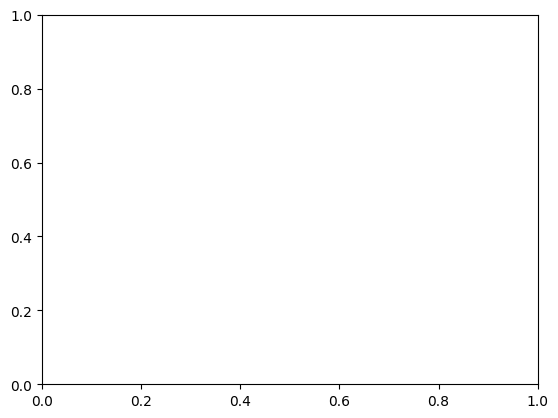

In [ ]:
# Plot
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Med. Age vs Fert. Rate')
plt.xlabel('Med. Age')
plt.ylabel('Fert. Rate')
plt.show()

Step 3: Multiple Linear Regression

Here, we'll use multiple features to predict 'Net Change

In [ ]:
# Define features and target
X = df[['Population (2020)', 'Yearly Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %']]
y = df['Net Change']

KeyError: "['Population (2020)'] not in index"

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.34437446002391825
R-squared: 0.8178649052651992


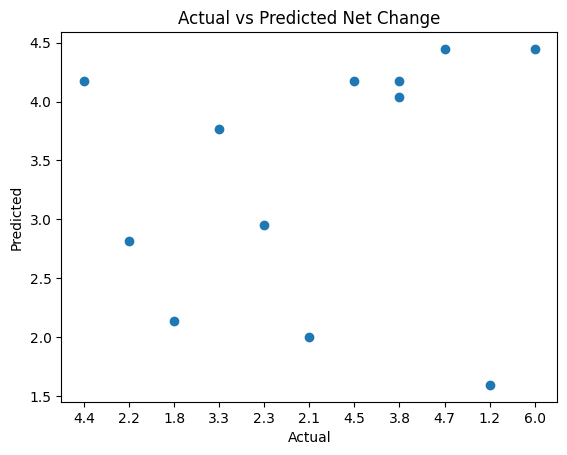

In [ ]:
# Plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Net Change')
plt.show()

Step 4: Polynomial Regression

Finally, we'll create a polynomial regression model between 'Med. Age' and 'Fert. Rate'.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Define features and target
X = df[['Med. Age']]
y = df['Fert. Rate']

In [ ]:
# Transform features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [ ]:
# Create model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)


In [ ]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.22111415139202725
R-squared: 0.883055651373813


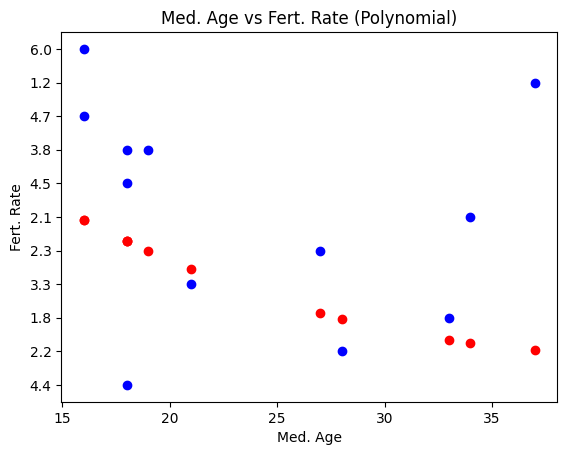

In [ ]:
# Plot
plt.scatter(X_test[:, 1], y_test, color='blue')
plt.scatter(X_test[:, 1], y_pred, color='red')
plt.title('Med. Age vs Fert. Rate (Polynomial)')
plt.xlabel('Med. Age')
plt.ylabel('Fert. Rate')
plt.show()

This code provides a comprehensive approach to scraping, cleaning, analyzing, and modeling data from https://www.worldometers.info/population/countries-in-africa-by-population/  